In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from tqdm import tqdm
import pyperclip
from bs4 import BeautifulSoup as bs

In [2]:
# URL 가져오기
driver = webdriver.Chrome() 
driver.get("https://www.quora.com/Did-you-have-a-good-or-bad-experience-with-LG-Indias-customer-care")

# 페이지 로딩 대기
time.sleep(2)

# 스크롤링
body = driver.find_element(By.CSS_SELECTOR, "body")

while True:
    last_soup = bs(driver.page_source, "lxml")
    body.send_keys(Keys.END)
    time.sleep(2)  # 스크롤 후 대기
    new_soup = bs(driver.page_source, "lxml")

    if last_soup == new_soup:
        break

# # 'read more' 버튼 클릭
# while True:
#     try:
#         # 모든 "read more" 버튼을 찾습니다.
#         read_more_buttons = driver.find_elements(By.XPATH, '//*[@id="mainContent"]/div[3]/div[1]/div/div/div/div/div[1]/div[2]/div/div[1]/div[2]/div/div[2]/div[1]/div/div/div/span/div/div/div/button')
        
#         if not read_more_buttons:
#             break
        
#         for button in read_more_buttons:
#             driver.execute_script("arguments[0].click();", button)
#             time.sleep(2)  # 클릭 후 대기
    
#     except Exception as e:
#         print(f"Error clicking 'read more' buttons: {e}")
#         break

soup = bs(driver.page_source, "lxml")

# 댓글 내용 추출
text_list = []
index = 0

while True:
    try:
        # 댓글 내용의 CSS 선택자를 사용하여 댓글 추출
        text_elements = soup.select(f'#mainContent > div:nth-child(3) > div.q-box.dom_annotate_question_answer_item_{index}.qu-borderAll.qu-borderColor--raised.qu-boxShadow--small.qu-mb--small.qu-bg--raised > div > div > div > div > div:nth-child(1) > div.q-box > div > div.q-click-wrapper.qu-display--block.qu-tapHighlight--none.qu-cursor--pointer.ClickWrapper___StyledClickWrapperBox-zoqi4f-0.bNPFlF > div.q-box.spacing_log_answer_content.puppeteer_test_answer_content')
        
        if not text_elements:
            break
        
        for elem in text_elements:
            text_list.append(elem.get_text(strip=True))
        
        index += 1
    
    except Exception as e:
        print(f"Error extracting text: {e}")
        break

# 결과 출력
for i, text in enumerate(text_list, start=1):
    print(f"Text {i}: {text}")

Text 1: Worst installation service from LGMy first time buying experience of AC is ruined by the LG installation team.1. Installation team arrived on third day of delivery.2. There is no proper coordination between LG and Amazon.3. LG installation team gave me estimation of ₹12,000. For complete installation.4. The LG installation team did core drilling on wall and left. They never visited again since 3 days.5. LG team overcharged the installation. If you don't get it done from them they blackmail you regarding warranty void.6. LG installation teams behaviour was like goons. They told me if you don'tContinue ReadingWorst installation service from LGMy first time buying experience of AC is ruined by the LG installation team.1. Installation team arrived on third day of delivery.2. There is no proper coordination between LG and Amazon.3. LG installation team gave me estimation of ₹12,000. For complete installation.4. The LG installation team did core drilling on wall and left. They never 

In [3]:
retext=pd.DataFrame({"text":text_list})

In [4]:
retext

,text
0,Worst installation service from LGMy first tim...
1,"As a loyal customer of LG products for years, ..."
2,DO NOT BUY LG PRODUCT.Very bad experience. For...
3,LG after sales services is extremely poor. I h...
4,"I purchased LG Dual Inverter AC [45, 500 Rs] i..."
5,Very Poor experience of LG customer Care. comp...
6,"First I attracted the LG AC features, but I di..."
7,LG TV SERVICES are very very very bad .No one ...
8,"The worst service centre , we have complained ..."
9,"I got LG Microwave, Refrigerator, TV and AC.-R..."


In [5]:
import nltk
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trainee206\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
stopwords=nltk.corpus.stopwords.words('english')

In [8]:
text_list_lower=[]
for i in text_list:
   text_list_lower.append(i.lower())
text_list_lower 

['worst installation service from lgmy first time buying experience of ac is ruined by the lg installation team.1. installation team arrived on third day of delivery.2. there is no proper coordination between lg and amazon.3. lg installation team gave me estimation of ₹12,000. for complete installation.4. the lg installation team did core drilling on wall and left. they never visited again since 3 days.5. lg team overcharged the installation. if you don\'t get it done from them they blackmail you regarding warranty void.6. lg installation teams behaviour was like goons. they told me if you don\'tcontinue readingworst installation service from lgmy first time buying experience of ac is ruined by the lg installation team.1. installation team arrived on third day of delivery.2. there is no proper coordination between lg and amazon.3. lg installation team gave me estimation of ₹12,000. for complete installation.4. the lg installation team did core drilling on wall and left. they never visi

In [9]:
retext

,text
0,Worst installation service from LGMy first tim...
1,"As a loyal customer of LG products for years, ..."
2,DO NOT BUY LG PRODUCT.Very bad experience. For...
3,LG after sales services is extremely poor. I h...
4,"I purchased LG Dual Inverter AC [45, 500 Rs] i..."
5,Very Poor experience of LG customer Care. comp...
6,"First I attracted the LG AC features, but I di..."
7,LG TV SERVICES are very very very bad .No one ...
8,"The worst service centre , we have complained ..."
9,"I got LG Microwave, Refrigerator, TV and AC.-R..."


In [10]:
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

In [11]:
def remove_stopwords(text):
    # 문자열을 단어로 나누기
    words = word_tokenize(text)
    # 구두점 제거
    words = [word for word in words if word.isalpha()]
    # 불용어 제거
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # 단어를 다시 문장으로 결합
    return ' '.join(filtered_words)

In [12]:
# 불용어 제거 처리
texts_no_stopwords = [remove_stopwords(text) for text in text_list_lower]

In [13]:
retext['texts_no_stopwords']=texts_no_stopwords

In [14]:
retext

,text,texts_no_stopwords
0,Worst installation service from LGMy first tim...,worst installation service lgmy first time buy...
1,"As a loyal customer of LG products for years, ...",loyal customer lg products years must express ...
2,DO NOT BUY LG PRODUCT.Very bad experience. For...,buy lg bad experience providing customer servi...
3,LG after sales services is extremely poor. I h...,lg sales services extremely poor problem washi...
4,"I purchased LG Dual Inverter AC [45, 500 Rs] i...",purchased lg dual inverter ac rs first week ma...
5,Very Poor experience of LG customer Care. comp...,poor experience lg customer care complete supp...
6,"First I attracted the LG AC features, but I di...",first attracted lg ac features realize worst s...
7,LG TV SERVICES are very very very bad .No one ...,lg tv services bad one responding call days fa...
8,"The worst service centre , we have complained ...",worst service centre complained washing machin...
9,"I got LG Microwave, Refrigerator, TV and AC.-R...",got lg microwave refrigerator tv ac jan due ba...


In [15]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize  # 필요한 함수만 임포트합니다.
from itertools import chain


In [16]:
result = []
for i in texts_no_stopwords:
    result.append(word_tokenize(i))
print(result)

[['worst', 'installation', 'service', 'lgmy', 'first', 'time', 'buying', 'experience', 'ac', 'ruined', 'lg', 'installation', 'installation', 'team', 'arrived', 'third', 'day', 'proper', 'coordination', 'lg', 'lg', 'installation', 'team', 'gave', 'estimation', 'complete', 'lg', 'installation', 'team', 'core', 'drilling', 'wall', 'left', 'never', 'visited', 'since', 'lg', 'team', 'overcharged', 'installation', 'get', 'done', 'blackmail', 'regarding', 'warranty', 'lg', 'installation', 'teams', 'behaviour', 'like', 'goons', 'told', 'readingworst', 'installation', 'service', 'lgmy', 'first', 'time', 'buying', 'experience', 'ac', 'ruined', 'lg', 'installation', 'installation', 'team', 'arrived', 'third', 'day', 'proper', 'coordination', 'lg', 'lg', 'installation', 'team', 'gave', 'estimation', 'complete', 'lg', 'installation', 'team', 'core', 'drilling', 'wall', 'left', 'never', 'visited', 'since', 'lg', 'team', 'overcharged', 'installation', 'get', 'done', 'blackmail', 'regarding', 'warrant

In [20]:
flattened_result = list(chain.from_iterable(result))
count=Counter(flattened_result)
count.most_common(30) #count 상위 10

[('lg', 91),
 ('service', 70),
 ('customer', 44),
 ('installation', 28),
 ('machine', 22),
 ('one', 20),
 ('ac', 19),
 ('care', 19),
 ('told', 18),
 ('days', 17),
 ('experience', 16),
 ('product', 16),
 ('washing', 16),
 ('products', 14),
 ('said', 14),
 ('like', 13),
 ('company', 13),
 ('services', 12),
 ('call', 12),
 ('came', 12),
 ('n', 12),
 ('complaint', 11),
 ('would', 11),
 ('technician', 11),
 ('worst', 10),
 ('first', 10),
 ('team', 10),
 ('day', 10),
 ('never', 10),
 ('buy', 10)]

In [21]:
#워드클라우드 선언
wordcloud=WordCloud(font_path='C:\Windows\Fonts\HMFMPYUN.TTF',
                    width=700,
                    height=700,
                    background_color='white',
                    colormap='spring',
                    random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

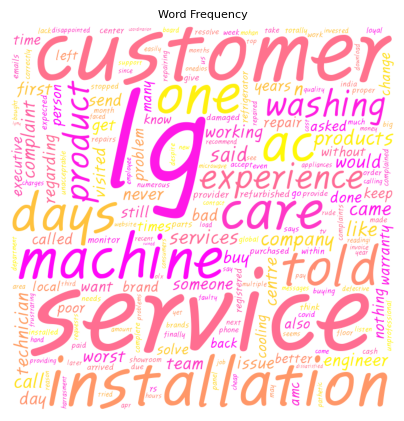

In [22]:
#워드클라우드 시각화
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Frequency', size=8)
plt.show